# **Regression Models selection for the given dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
px.defaults.template = 'plotly_dark'

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

from math import sqrt

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('df2.csv')
df.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


In [3]:
df.columns

Index(['VendorID', 'passenger_count', 'fare_amount', 'mean_distance',
       'mean_duration', 'rush_hour'],
      dtype='object')

In [4]:
df.shape

(22699, 6)

In [5]:
y = df['fare_amount']
y.head()

0    13.0
1    16.0
2     6.5
3    20.5
4    16.5
Name: fare_amount, dtype: float64

In [6]:
X = df.copy()
X = X.drop(columns='fare_amount')
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [8]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (18159, 5)
X_test shape : (4540, 5)
y_train shape : (18159,)
y_test shape : (4540,)


### **Commonly used regression evaluation metrics :**

**R-squared (R2)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect 

**Mean Squared Error (MSE)**: Measures the average of the squares of the errors or deviations, which is the difference between the estimator and what is estimated.

**Mean Absolute Error (MAE)**: Measures the average of the absolute errors between the predicted and actual values.

**Root Mean Squared Error (RMSE)**: Represents the square root of the MSE and provides a measure of how spread out the residuals are.



# **Regression Model Comparision**

### **Linear Regression**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lin = LinearRegression()
model_lin.fit(X_train_scaled , y_train)

# Predict on the test set
y_pred = model_lin.predict(X_test_scaled)

# Calculate evaluation metrics
r2_lin = round(metrics.r2_score(y_test, y_pred)*100,3)
mse_lin = round(metrics.mean_squared_error(y_test, y_pred),3)
rmse_lin = round(np.sqrt(mse_lin),3)
mae_lin = round(metrics.mean_absolute_error(y_test, y_pred),3)

# Create a DataFrame to store the evaluation metrics
metrics_lin = pd.DataFrame({'Model': ['Linear Regression'],                            
                            'R-squared': [r2_lin],
                            'Mean Squared Error (MSE)': [mse_lin],
                            'Root Mean Squared Error (RMSE)': [rmse_lin],
                            'Mean Absolute Error (MAE)': [mae_lin]
                           })

# Display the DataFrame
metrics_lin

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,86.826,14.326,3.785,2.134


## **Ridge**

In [10]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha = 0.3 
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = model_ridge.predict(X_test_scaled)

# Calculate evaluation metrics
r2_ridge = round(metrics.r2_score(y_test, y_pred_ridge)*100,3)
mse_ridge = round(metrics.mean_squared_error(y_test, y_pred_ridge),3)
mae_ridge = round(metrics.mean_absolute_error(y_test, y_pred_ridge),3)
rmse_ridge = round(np.sqrt(mse_ridge),3)

# Create a DataFrame to store the evaluation metrics
metrics_ridge = pd.DataFrame({'Model': ['Ridge Regression'],                            
                            'R-squared': [r2_ridge],
                            'Mean Squared Error (MSE)': [mse_ridge],
                            'Root Mean Squared Error (RMSE)': [rmse_ridge],
                            'Mean Absolute Error (MAE)': [mae_ridge],
                           })

# Display the DataFrame
metrics_ridge

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Ridge Regression,86.826,14.326,3.785,2.134


## **Lasso**

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha parameter for Lasso regularization
alpha = 0.00009 

# Instantiate and fit the Lasso regression model
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = model_lasso.predict(X_test_scaled)

# Calculate evaluation metrics
r2_lasso = round(metrics.r2_score(y_test, y_pred_lasso)*100,3)
mse_lasso = round(metrics.mean_squared_error(y_test, y_pred_lasso),3)
mae_lasso = round(metrics.mean_absolute_error(y_test, y_pred_lasso),3)
rmse_lasso = round(np.sqrt(mse_lasso),3)

# Create a DataFrame to store the evaluation metrics for Lasso regression
metrics_lasso = pd.DataFrame({'Model': ['Lasso Regression'],                            
                            'R-squared': [r2_lasso],
                            'Mean Squared Error (MSE)': [mse_lasso],
                            'Root Mean Squared Error (RMSE)': [rmse_lasso],
                            'Mean Absolute Error (MAE)': [mae_lasso],
                           })

# Display the DataFrame for Lasso regression
metrics_lasso

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Lasso Regression,86.826,14.326,3.785,2.134


## **ElasticNet**

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha parameter for ElasticNet regularization
alpha = 1
l1_ratio=0.5

# Instantiate and fit the ElasticNet regression model
model_elasticnet = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
model_elasticnet.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_elasticnet = model_elasticnet.predict(X_test_scaled)

# Calculate evaluation metrics
r2_elasticnet = round(metrics.r2_score(y_test, y_pred_elasticnet)*100, 3)
mse_elasticnet = round(metrics.mean_squared_error(y_test, y_pred_elasticnet),3)
mae_elasticnet = round(metrics.mean_absolute_error(y_test, y_pred_elasticnet),3)
rmse_elasticnet = round(np.sqrt(mse_elasticnet),3)

# Create a DataFrame to store the evaluation metrics for ElasticNet regression
metrics_elasticnet = pd.DataFrame({'Model': ['ElasticNet Regression'],                            
                            'R-squared': [r2_elasticnet],
                            'Mean Squared Error (MSE)': [mse_elasticnet],
                            'Root Mean Squared Error (RMSE)': [rmse_elasticnet],
                            'Mean Absolute Error (MAE)': [mae_elasticnet],
                           })

# Display the DataFrame for ElasticNet regression
metrics_elasticnet

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,ElasticNet Regression,80.019,21.729,4.661,2.95


## **Random Forest Regression**

In [13]:

model_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
r2_rf = round(metrics.r2_score(y_test, y_pred_rf) * 100, 3)
mse_rf = round(metrics.mean_squared_error(y_test, y_pred_rf),3)
mae_rf = round(metrics.mean_absolute_error(y_test, y_pred_rf),3)
rmse_rf = round(np.sqrt(mse_rf),3)

# Create a DataFrame to store the evaluation metrics for RandomForestRegressor
metrics_rf = pd.DataFrame({'Model': ['Random Forest Regression'],                            
                           'R-squared': [r2_rf],
                           'Mean Squared Error (MSE)': [mse_rf],
                           'Root Mean Squared Error (RMSE)': [rmse_rf],
                           'Mean Absolute Error (MAE)': [mae_rf]
                          })

metrics_rf

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Random Forest Regression,84.951,16.365,4.045,2.364


## **AdaBoost Regression**

In [14]:
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)
model_adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred_adaboost = model_adaboost.predict(X_test)

# Calculate evaluation metrics
r2_adaboost = round(metrics.r2_score(y_test, y_pred_adaboost) * 100, 3)
mse_adaboost = round(metrics.mean_squared_error(y_test, y_pred_adaboost),3)
mae_adaboost = round(metrics.mean_absolute_error(y_test, y_pred_adaboost),3)
rmse_adaboost = round(np.sqrt(mse_adaboost),3)

# Create a DataFrame to store the evaluation metrics for AdaBoostRegressor
metrics_adaboost = pd.DataFrame({'Model': ['AdaBoost Regression'],                            
                                 'R-squared': [r2_adaboost],
                                 'Mean Squared Error (MSE)': [mse_adaboost],
                                 'Root Mean Squared Error (RMSE)': [rmse_adaboost],
                                 'Mean Absolute Error (MAE)': [mae_adaboost]
                                })

# Display the DataFrame for AdaBoostRegressor
metrics_adaboost

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,AdaBoost Regression,36.111,69.478,8.335,6.347


# **Extra trees Regressor**

In [15]:
model_extra_trees = ExtraTreesRegressor(n_estimators=50, max_depth=None, random_state=42)
model_extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred_extra_trees = model_extra_trees.predict(X_test)

# Calculate evaluation metrics
r2_extra_trees = round(metrics.r2_score(y_test, y_pred_extra_trees) * 100, 3)
mse_extra_trees = round(metrics.mean_squared_error(y_test, y_pred_extra_trees),3)
mae_extra_trees = round(metrics.mean_absolute_error(y_test, y_pred_extra_trees),3)
rmse_extra_trees = round(np.sqrt(mse_extra_trees),3)

# Create a DataFrame to store the evaluation metrics for ExtraTreesRegressor
metrics_extra_trees = pd.DataFrame({'Model': ['Extra Trees Regression'],                            
                                    'R-squared': [r2_extra_trees],
                                    'Mean Squared Error (MSE)': [mse_extra_trees],
                                    'Root Mean Squared Error (RMSE)': [rmse_extra_trees],
                                    'Mean Absolute Error (MAE)': [mae_extra_trees]
                                   })

# Display the DataFrame for ExtraTreesRegressor
metrics_extra_trees

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Extra Trees Regression,83.348,18.109,4.255,2.491


# **Gradient_boosting**

In [16]:
model_gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gradient_boosting.fit(X_train, y_train)

# Predict on the test set
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

# Calculate evaluation metrics
r2_gradient_boosting = round(metrics.r2_score(y_test, y_pred_gradient_boosting) * 100, 3)
mse_gradient_boosting = round(metrics.mean_squared_error(y_test, y_pred_gradient_boosting),3)
mae_gradient_boosting = round(metrics.mean_absolute_error(y_test, y_pred_gradient_boosting),3)
rmse_gradient_boosting = round(np.sqrt(mse_gradient_boosting),3)

# Create a DataFrame to store the evaluation metrics for GradientBoostingRegressor
metrics_gradient_boosting = pd.DataFrame({'Model': ['Gradient Boosting Regression'],                            
                                          'R-squared': [r2_gradient_boosting],
                                          'Mean Squared Error (MSE)': [mse_gradient_boosting],
                                          'Root Mean Squared Error (RMSE)': [rmse_gradient_boosting],
                                          'Mean Absolute Error (MAE)': [mae_gradient_boosting]
                                         })

# Display the DataFrame for GradientBoostingRegressor
metrics_gradient_boosting

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Gradient Boosting Regression,88.408,12.606,3.55,2.041


# **Extreme Gradient Boosting (XGBoost)**

In [17]:
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics
r2_xgb = round(metrics.r2_score(y_test, y_pred_xgb) * 100, 3)
mse_xgb = round(metrics.mean_squared_error(y_test, y_pred_xgb),3)
mae_xgb = round(metrics.mean_absolute_error(y_test, y_pred_xgb),3)
rmse_xgb = round(np.sqrt(mse_xgb),3)

# Create a DataFrame to store the evaluation metrics for XGBoostRegressor
metrics_xgb = pd.DataFrame({'Model': ['XGBoost Regression'],                            
                            'R-squared': [r2_xgb],
                            'Mean Squared Error (MSE)': [mse_xgb],
                            'Root Mean Squared Error (RMSE)': [rmse_xgb],
                            'Mean Absolute Error (MAE)': [mae_xgb]
                           })

metrics_xgb

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,XGBoost Regression,88.304,12.719,3.566,2.047


# **Decision Tree Regresssor**

In [18]:
model_decision_tree = DecisionTreeRegressor(max_depth=None, random_state=42)
model_decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Calculate evaluation metrics
r2_decision_tree = round(metrics.r2_score(y_test, y_pred_decision_tree) * 100, 3)
mse_decision_tree = round(metrics.mean_squared_error(y_test, y_pred_decision_tree),3)
mae_decision_tree = round(metrics.mean_absolute_error(y_test, y_pred_decision_tree),3)
rmse_decision_tree = round(np.sqrt(mse_decision_tree),3)

# Create a DataFrame to store the evaluation metrics for DecisionTreeRegressor
metrics_decision_tree = pd.DataFrame({'Model': ['Decision Tree Regression'],                            
                                      'R-squared': [r2_decision_tree],
                                      'Mean Squared Error (MSE)': [mse_decision_tree],
                                      'Root Mean Squared Error (RMSE)': [rmse_decision_tree],
                                      'Mean Absolute Error (MAE)': [mae_decision_tree]
                                     })

# Display the DataFrame for DecisionTreeRegressor
metrics_decision_tree

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Decision Tree Regression,80.206,21.525,4.64,2.703


## **Multi-layer Perceptron (MLP) regressor**

In [19]:
model_mlp = MLPRegressor(hidden_layer_sizes=(100, ), alpha=0.0001, random_state=42)
model_mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = model_mlp.predict(X_test)

# Calculate evaluation metrics
r2_mlp = round(metrics.r2_score(y_test, y_pred_mlp) * 100, 3)
mse_mlp = round(metrics.mean_squared_error(y_test, y_pred_mlp),3)
mae_mlp = round(metrics.mean_absolute_error(y_test, y_pred_mlp),3)
rmse_mlp = round(np.sqrt(mse_mlp),3)

# Create a DataFrame to store the evaluation metrics for MLPRegressor
metrics_mlp = pd.DataFrame({'Model': ['MLP Regression'],                            
                            'R-squared': [r2_mlp],
                            'Mean Squared Error (MSE)': [mse_mlp],
                            'Root Mean Squared Error (RMSE)': [rmse_mlp],
                            'Mean Absolute Error (MAE)': [mae_mlp]
                           })

# Display the DataFrame for MLPRegressor
metrics_mlp

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,MLP Regression,88.218,12.812,3.579,2.099


# Concatenate the metrics DataFrames of all models

In [20]:
# Concatenate all the metrics DataFrames
comparision_metrics = pd.concat([metrics_lin, metrics_ridge, metrics_lasso, metrics_elasticnet, 
                         metrics_rf, metrics_adaboost, metrics_extra_trees, metrics_gradient_boosting, 
                         metrics_decision_tree, metrics_mlp, metrics_xgb], ignore_index=False)

comparision_metrics_sorted = comparision_metrics .sort_values(by='R-squared', ascending=False).reset_index(drop=True)

comparision_metrics_sorted


,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Gradient Boosting Regression,88.408,12.606,3.550,2.041
1,XGBoost Regression,88.304,12.719,3.566,2.047
2,MLP Regression,88.218,12.812,3.579,2.099
3,Linear Regression,86.826,14.326,3.785,2.134
4,Ridge Regression,86.826,14.326,3.785,2.134
5,Lasso Regression,86.826,14.326,3.785,2.134
6,Random Forest Regression,84.951,16.365,4.045,2.364
7,Extra Trees Regression,83.348,18.109,4.255,2.491
8,Decision Tree Regression,80.206,21.525,4.640,2.703
9,ElasticNet Regression,80.019,21.729,4.661,2.950


# **Conclusion :**

To determine the best model from the provided metrics, we typically look for the model with the highest R-squared value and the lowest values for Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

From the given metrics, the best model appears to be the Gradient Boosting Regression model:

    R-squared: 88.408 (highest among all models)
    Mean Squared Error (MSE): 12.606 (among the lowest)
    Root Mean Squared Error (RMSE): 3.550 (among the lowest)
    Mean Absolute Error (MAE): 2.041 (among the lowest)

So, based on these metrics, the Gradient Boosting Regression model outperforms the others.

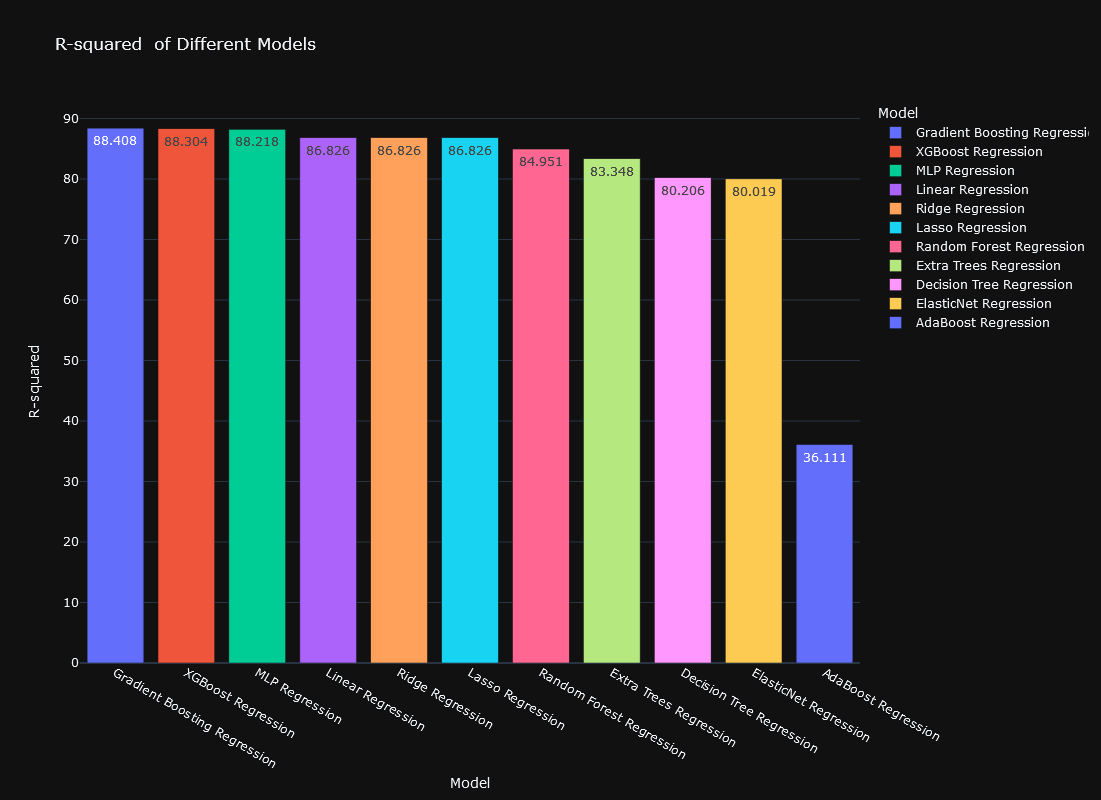

In [22]:
comparision_metrics_plt = px.bar(comparision_metrics_sorted,
                                 x='Model',
                                 y='R-squared',  
                                 title='R-squared  of Different Models',
                                 height=800,
                                 color='Model',
                                 text='R-squared',  # Add text for both metrics
                                 )

comparision_metrics_plt.show()